# Importing 

In [1]:
import numpy
import pylab

#This module has the fit code
import SterileSearchPy as ssp

#And this will bring in code for cute plots
import SterilePlotting

In [2]:
%matplotlib inline

# Configuration

In [5]:
#An object of type "DataPaths" is used to set where we find all the data.
# make one like this:
dp=ssp.DataPaths()

#For this notebook we will set these two:
dp.squids_files_path="/data/user/bjones/Sterilizer/Sterilizer/conventional_fluxes/"
dp.prompt_squids_files_path="/data/user/bjones/Sterilizer/Sterilizer/prompt_fluxes/"
dp.compact_file_path='/tmp/bjones/'

In [6]:
# An object of type "SteeringParams" is used to configure the fitter.
sp=ssp.SteeringParams()

#For this notebook, we set the binning, and not to read compact
sp.ReadCompact=False
sp.logEbinEdge=numpy.log10(400)
sp.logEbinWidth=0.17

In [7]:
# And an object of type "SterileNuParams" sets the hypothesis we will fit against.
#   Here we set it to the null hypothesis
#
snp=ssp.SterileNuParams()
snp.del14=0
snp.del24=0
snp.dm41sq=0
snp.modelId=0
snp.th14=0
snp.th24=0
snp.th34=0

In [8]:
# Having picked our parameters, we build the Sterilizer object.
# This is configured with one MC set and loads the data automatically
#   - but if we want to we can replace the data with something else later.
#   (see spitting and swallowing below)
# It is also configured with one set of sterile neutrino parameters,
# and one set of data paths / steering parameters. 
# See the section "Configurable parameters" below for more information on these.
#
# Note - it will take a while to build but you can watch progress on the command line.

sterilizer = ssp.Sterilizer(dp,sp,snp)

# Nuisance parameters

In [9]:
# We can probe various distributions of the MC at different values of the nuisance 
# parameters. A set of nuisance parameters is supplied via a ssp.Nuisance object.
# tab complete one to see what its members are.

# This is the default set of nuisance params
DefaultNuisance = ssp.Nuisance()

# And here is another set, but we modified the pi/k ratio by 20%
ModifiedNuisance = ssp.Nuisance()
ModifiedNuisance.piKRatio=1.2

# Getting Distributions

In [10]:
# The data and MC load automatically into histograms.
# For most of our plots we will need to know how they are binned.
# This is how we find out.

EbinsData = numpy.array(sterilizer.GetEnergyBinsData())
EbinsMC   = numpy.array(sterilizer.GetEnergyBinsMC())
ZbinsData = numpy.array(sterilizer.GetZenithBinsData())
ZbinsMC   = numpy.array(sterilizer.GetZenithBinsMC())

In [11]:
#This is how to get the data distribution. [0] means year 0, which
# is 2011. We only have this year for now.

data=sterilizer.GetDataDistribution()[0]

In [12]:
#This is how to get the expectation of the MC, with two different
#  sets of nuisance parameters

expecDefault = sterilizer.GetExpectation(DefaultNuisance)[0]
expecModPiK  = sterilizer.GetExpectation(ModifiedNuisance)[0]

In [13]:
#This will give you one random realization of the MC (realization number 1 in this case):

randomseed   = 1
realization  = sterilizer.GetRealization(DefaultNuisance,randomseed)[0]

# Plotting

In [14]:
# The SterilePlotting module has some handy default plots in it.
# Refer to and modify code therein for more advanced plots.

SterilePlotting.py:25: RuntimeWarning: divide by zero encountered in log10
  pylab.hist2d(cv_flat,ev_flat,weights=numpy.log10(data_flat), bins=(zbins,numpy.log10(ebins)),cmap=pylab.get_cmap('Blues'))


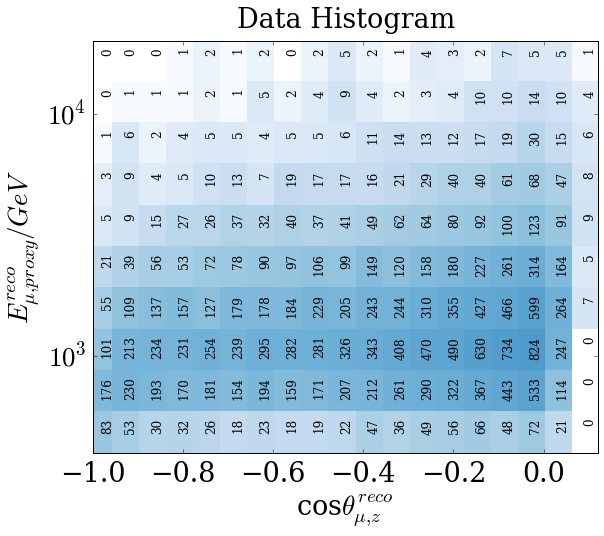

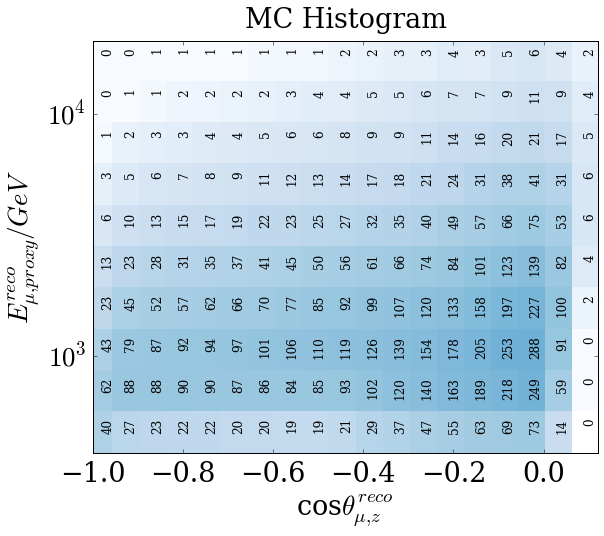

In [15]:
# This makes the absolute counts plot (two examples)
SterilePlotting.Draw2DAbsHistogram(data,bins=(EbinsData,ZbinsData),title="Data Histogram")
SterilePlotting.Draw2DAbsHistogram(expecDefault,bins=(EbinsMC,ZbinsMC),title="MC Histogram")

here


SterilePlotting.py:62: RuntimeWarning: invalid value encountered in divide
  data_flat=(((data1-data2)/data1)*100).flatten()


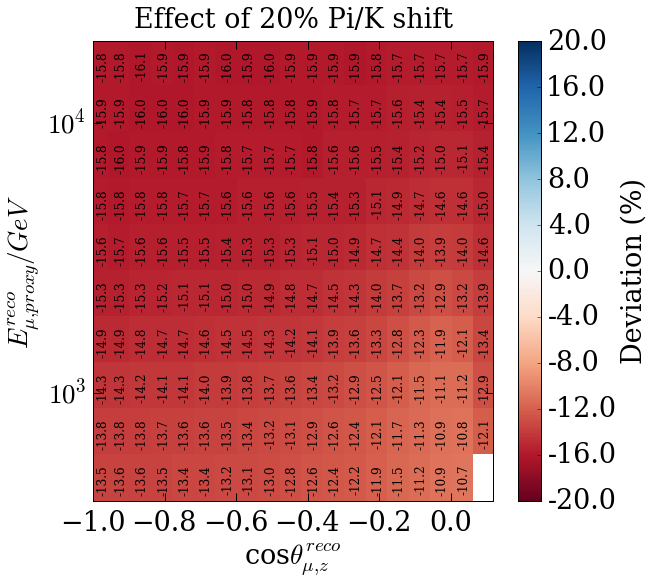

In [16]:
# This makes a ratio plot ((d1-d2)/d1)
SterilePlotting.Draw2DRatioHistogram(expecDefault,expecModPiK,bins=(EbinsData,ZbinsData),title="Effect of 20% Pi/K shift")

here


SterilePlotting.py:106: RuntimeWarning: invalid value encountered in divide
  data_flat=((data-expectation)/numpy.sqrt(expectation)).flatten()


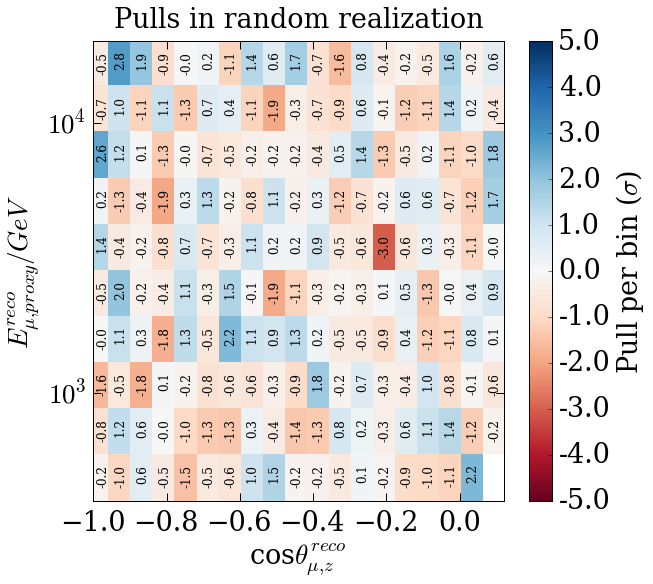

In [17]:
# This makes a pulls plot ((data-mc) / sqrt(mc))
SterilePlotting.Draw2DPullPlot(realization,expecDefault,bins=(EbinsMC,ZbinsMC),title="Pulls in random realization")

#Reading and Writing Compact 

In [ ]:
# To speed up the MC loading process we can store a compact version of the data
#  and suck it in later. Here is how we store it:

sterilizer.WriteCompact()

In [ ]:
# And here is how to read it, into a new sterilizer object:
sp.ReadCompact=True
newsterilizer=ssp.Sterilizer(dp,sp,snp)
newmc=newsterilizer.GetExpectation(DefaultNuisance)[0]
EbinsNewMC = numpy.array(newsterilizer.GetEnergyBinsMC())
ZbinsNewMC = numpy.array(newsterilizer.GetZenithBinsMC())
SterilePlotting.Draw2DAbsHistogram(newdata,bins=(EbinsNewMC,ZbinsNewMC),title="New Data")

# Spitting and Swallowing

In [ ]:
# We can get data, expectations and realizations out as actual event lists. Like this:
DataList         = sterilizer.SpitData()
RealizationList  = sterilizer.SpitRealization(DefaultNuisance,randomseed)
ExpectationList  = sterilizer.SpitExpectation(DefaultNuisance)

# it has entries that look like this:
print("Length", len(Data))
e1=Data[1]
print("Energy: ", e1.Energy,",  Zenith: ",e1.Zenith,",  Year: ", e1.Year, "  Weight: ", e1.Weight)

In [ ]:
# And if we have such a list, we can feed it as if it were data to a Sterilizer.
# Lets make a new one for this purpose (we can have many at once)
# This object could be used to compute the asimov sensitivity, for example.

newsterilizer=Sterilizer(dp,sp,snp)
newsterilizer.Swallow(ExpectationList)


# Configurable Parameters

In [ ]:
# In SteeringParams:

# Data / MC Configuration
sp.useBurnSample       # Whether to load burnsample or full data
sp.ReadCompact         # Read compact or full data and mc
sp.xs_model_name       # Which cross section model to use
sp.modelName           # Which flux model to use
sp.oversizeFunction    # Which oversize function to use
sp.simToLoad           # Which simulation set to load

#Binning
sp.cosThbinEdge        # Cos theta binning
sp.cosThbinWidth       #  --
sp.maxCosth            #  --
sp.minCosth            #  --

sp.logEbinEdge         # Energy binning
sp.logEbinWidth        #  --
sp.maxFitEnergy        #  --
sp.minFitEnergy        #  --

#Livetime
sp.years               # which years to load
sp.burnSampleLivetime  # total livetime of burn sample
sp.fullLivetime        # total livetime of full sample

#Technical stuff
sp.useFactorization    # Whether to enable oscillation factorization
sp.evalThreads         # How many threads to use for evaluating fits
sp.quiet               # Control program verbosity

In [ ]:
#List of datapaths parameters:

dp.compact_file_path  # Compact data processed and dumped to disk (.dat) is
dp.data_path          # Full scale data file (.hdf5) is
dp.domeff_spline_path # Dom efficiency correction splines are (.dat)
dp.mc_path            # Where the full scale MC files are after processEnergy (.hdf5)
dp.oversize_path      # Oversize correction function for changing oversize MC to non-oversize MC (.dat)
dp.squids_files_path  # Conventional atmospheric flux evolved by squids for various osc hypotheses are (.hdf5)
dp.prompt_squids_files_path  # as above but the prompt flux (.hdf5)
dp.xs_spline_path     # Cross section splines (.fits) 
dp.flux_splines_path  # Flux splines (.fits) are - for factorized mode only